In [102]:
import pandas as pd
import numpy as np
%matplotlib inline

In [10]:
names1880 = pd.read_csv('yob1880.txt', names = ['name', 'sex', 'births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [11]:
# сгруппируем по полу и определим количество мальчик и девочек
names1880.groupby('sex').births.sum()

sex
F     90994
M    110490
Name: births, dtype: int64

In [14]:
# последний доступный год 2018
years = range (1880, 2018)

pieces = []
columns = [ 'name', 'sex', 'births']

for year in years:
    path = 'yob%d.txt' % year
    df = pd.read_csv (path, names = columns)
    df['year'] = year
    pieces.append (df)
    
    names = pd.concat (pieces, ignore_index = True)

names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1925008,Zykai,M,5,2017
1925009,Zykeem,M,5,2017
1925010,Zylin,M,5,2017
1925011,Zylis,M,5,2017


In [18]:
# аггрегируем данные на уровне года и пола

total_births = names.pivot_table ('births', index = 'year', columns = 'sex',
                                 aggfunc = sum)
total_births [-15:]

sex,F,M
year,,
2003,1826173,1974274
2004,1835091,1983722
2005,1846525,1996022
2006,1899824,2053753
2007,1921053,2073784
2008,1889069,2038194
2009,1835062,1981481
2010,1775345,1916476
2011,1756592,1896574


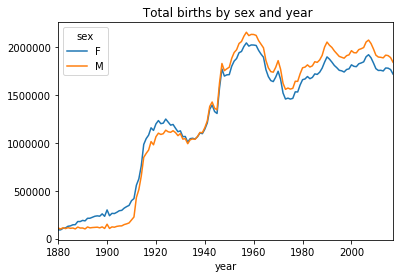

In [21]:
#построим график по годам и полу

total_births.plot(title = ' Total births by sex and year')

In [22]:
#вставим столбец prop, содержащий долю младенцев , получивших данное имя, относительно общего числа родившихся

def add_prop (group) :
    births = group.births.astype (float)
    group ['prop'] = births / births.sum()
    return group

names = names.groupby (['year', 'sex']).apply(add_prop)
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1925008,Zykai,M,5,2017,0.000003
1925009,Zykeem,M,5,2017,0.000003
1925010,Zylin,M,5,2017,0.000003
1925011,Zylis,M,5,2017,0.000003


In [26]:
# проверка на разумность результата prop должен быть = 1

np.allclose (names.groupby (['year', 'sex']).prop.sum(), 1)

True

In [63]:
def get_top1000 (group):
    return group.sort_values (by = 'births', ascending = False)[:1000]
grouped = names.groupby ( ['year', 'sex'])
top1000 = grouped.apply (get_top1000)
top1000 [-15:]

name sex  births  year      prop
year sex                                               
2017 M   1911783   Gianluca   M     207  2017  0.000112
         1911784    Jovanni   M     207  2017  0.000112
         1911785    Yisroel   M     207  2017  0.000112
         1911786      Anton   M     206  2017  0.000112
         1911789  Giancarlo   M     205  2017  0.000111
         1911788    Eliezer   M     205  2017  0.000111
         1911787     Bishop   M     205  2017  0.000111
         1911790    Brenden   M     204  2017  0.000111
         1911791       Lyle   M     204  2017  0.000111
         1911792     Alaric   M     203  2017  0.000110
         1911793     Camron   M     203  2017  0.000110
         1911794     Decker   M     203  2017  0.000110
         1911795     Tyrone   M     203  2017  0.000110
         1911796     Howard   M     202  2017  0.000110
         1911797       Jaxx   M     202  2017  0.000110

In [64]:
# анализ тенденций в выборе имен
boys = top1000[top1000.sex == 'M']
girls = top1000 [top1000.sex == 'F']
top1000 = top1000.drop (columns = ['sex','year'])

In [61]:
total_births = top1000.pivot_table ( 'births', index = 'year', columns = 'name', aggfunc = sum)
total_births

name,Aaden,Aadhya,Aaliyah,Aanya,Aarav,Aaron,Aarush,Ab,Abagail,Abb,...,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri,Zyaire
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,...,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,...,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,...,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,...,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,...,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,204.0,NaN,5233.0,NaN,495.0,7306.0,NaN,NaN,NaN,NaN,...,5971.0,7242.0,432.0,NaN,NaN,NaN,NaN,NaN,568.0,NaN
2014,239.0,NaN,4883.0,266.0,531.0,7392.0,NaN,NaN,NaN,NaN,...,5877.0,7411.0,366.0,NaN,NaN,NaN,NaN,NaN,666.0,NaN
2015,297.0,NaN,4863.0,NaN,540.0,7159.0,211.0,NaN,NaN,NaN,...,6041.0,6944.0,371.0,NaN,NaN,NaN,NaN,NaN,714.0,NaN


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000135AE2E2648>,
      dtype=object)

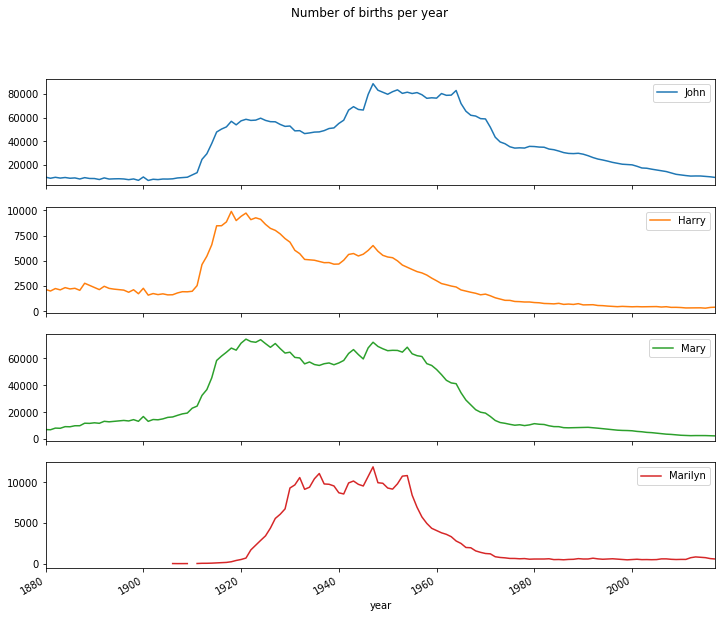

In [66]:
subset = total_births [[ 'John', 'Harry', 'Mary', 'Marilyn']]
subset.plot (subplots = True, figsize = (12, 10), grid = False, title = 'Number of births per year')

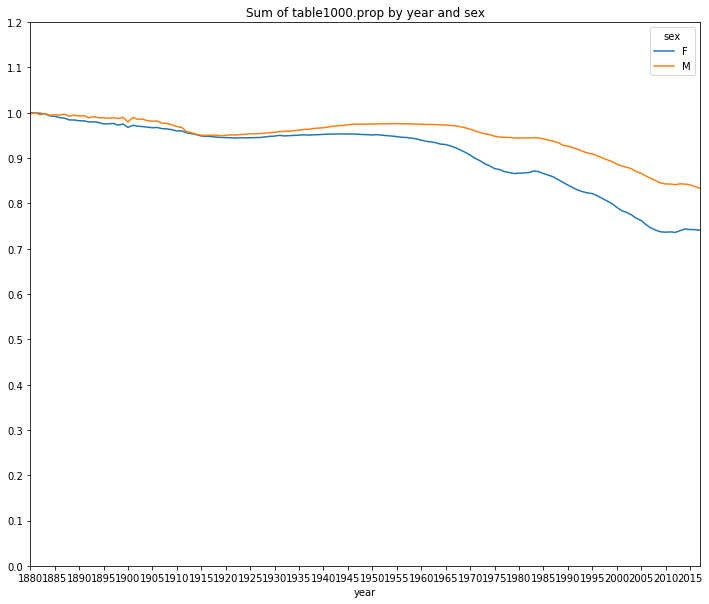

In [71]:
# измерение роста разнообразия имен
table = top1000.pivot_table ('prop', index = 'year', columns = 'sex', aggfunc = sum)
table.plot (title = 'Sum of table1000.prop by year and sex', yticks = np.linspace (0, 1.2, 13), xticks = range (1880, 2020, 5), figsize = (12,10))

In [79]:
# определение количества разных имен среди первых 50%, упорядоченное по популярности в порядке убывания
df = boys[boys.year == 2017]
# использование Numpy для определения количсества имен, чтобы достичь 50%

prop_cumsum = df.sort_values(by = 'prop', ascending = False).prop.cumsum ()
prop_cumsum [:10]

year  sex         
2017  M    1910798    0.010201
           1910799    0.020191
           1910800    0.028312
           1910801    0.036067
           1910802    0.043672
           1910803    0.051159
           1910804    0.058511
           1910805    0.065752
           1910806    0.072911
           1910807    0.080062
Name: prop, dtype: float64

In [80]:
prop_cumsum.searchsorted (0.5) + 1 # тк индекс начинается с 0

143

In [81]:
def get_quantile_count (group, q = 0.5) :
    group = group.sort_values (by = 'prop', ascending = False)
    return group.prop.cumsum().searchsorted(q)+1

diversity = top1000.groupby (['year', 'sex']).apply (get_quantile_count)
diversity = diversity.unstack ('sex')

In [82]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


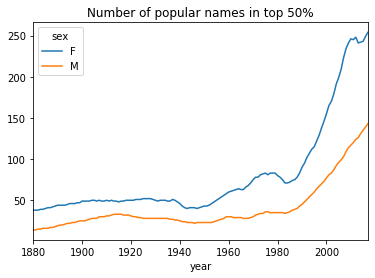

In [83]:
diversity.plot (title = 'Number of popular names in top 50%')

In [89]:
get_last_letter = lambda x: x[-1]
last_letters = names.name.map (get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table ('births', index = last_letters, columns = ['sex', 'year'], aggfunc = sum)

In [90]:
subtable = table.reindex (columns = [1910, 1960, 2010], level = 'year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108399.0  691261.0  676865.0    977.0    5212.0   28868.0
b                 NaN     694.0     455.0    411.0    3912.0   39276.0
c                 5.0      49.0     956.0    482.0   15454.0   23348.0
d              6751.0    3731.0    2642.0  22113.0  262116.0   44828.0
e            133601.0  435030.0  316764.0  28665.0  178768.0  130253.0

In [91]:
subtable.sum()

sex  year
F    1910     396505.0
     1960    2022010.0
     2010    1775345.0
M    1910     194212.0
     1960    2132155.0
     2010    1916476.0
dtype: float64

In [93]:
letter_prop = subtable / subtable.sum().astype(float)

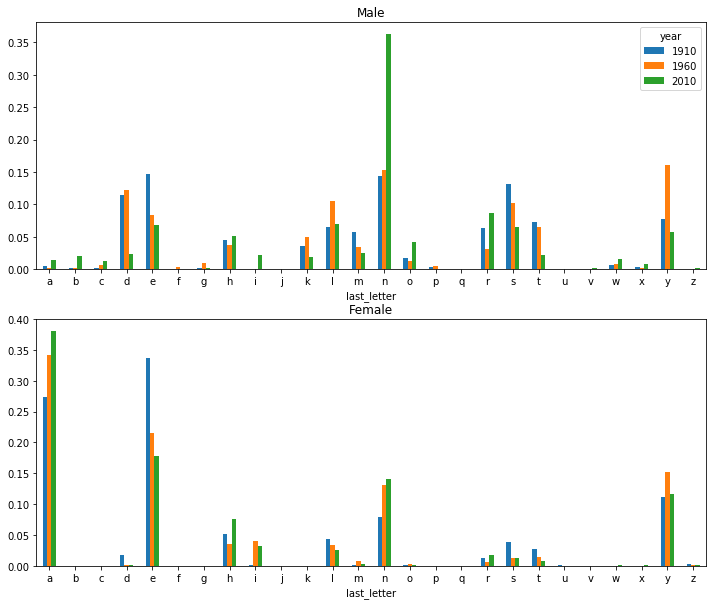

In [95]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots (2,1,figsize = (12,10))
letter_prop ['M'].plot (kind = 'bar', rot = 0, ax = axes [0], title = 'Male')
letter_prop ['F'].plot (kind = 'bar', rot = 0, ax = axes [1], title = 'Female', legend = False)

In [96]:
# определение тенденций

letter_prop = table / table.sum().astype(float)
dny_ts = letter_prop.loc [['d','n', 'y'], 'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083057,0.153217,0.075763
1881,0.083242,0.153212,0.077455
1882,0.085332,0.149561,0.077538
1883,0.084053,0.151656,0.079149
1884,0.086122,0.149927,0.080408


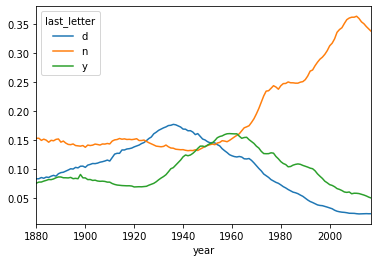

In [97]:
dny_ts.plot()

In [98]:
# мужские имена, ставшие женскими, и наоборот

all_names = top1000.name.unique()
mask = np.array (['lesl' in x.lower() for x in all_names])
lesley_like = all_names [mask]
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [107]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee       993
Lesley     35033
Lesli        929
Leslie    377571
Lesly      11433
Name: births, dtype: int64

In [110]:
table = filtered.pivot_table ('births', index = 'year', columns = 'sex', aggfunc = sum)
table = table.div (table.sum(1), axis = 0)
table.tail()

sex,F,M
year,,
2013,1.0,NaN
2014,1.0,NaN
2015,1.0,NaN
2016,1.0,NaN
2017,1.0,NaN


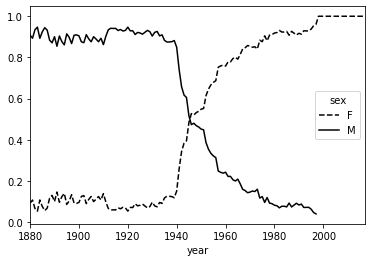

In [113]:
table.plot(style = {'M': 'k-', 'F': 'k--'})